#### simple linear regression model 



In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [4]:
#import dataset
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [15]:
#simple linear regression 
X = df[['age']]
y = df['fare']



In [16]:
X

,age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
886,27.0
887,19.0
888,NaN
889,26.0


C:\Users\B S COM\AppData\Local\Temp\ipykernel_12188\1753519474.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.age.fillna(value =X['age'].mean(),inplace=True)


In [18]:
X

,age
0,22.000000
1,38.000000
2,26.000000
3,35.000000
4,35.000000
...,...
886,27.000000
887,19.000000
888,29.699118
889,26.000000


In [20]:
y.isnull().sum()/len(X)*100

0.0

In [21]:
X.shape

(891, 1)

In [22]:
y.shape

(891,)

In [27]:
df_linear= df[['age','fare']]

In [28]:
df_linear

,age,fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
886,27.0,13.0000
887,19.0,30.0000
888,NaN,23.4500
889,26.0,30.0000


In [ ]:
#plotting
sns.lmplot(data)

In [29]:
df_linear.age.fillna(value =df_linear['age'].mean(),inplace=True)

C:\Users\B S COM\AppData\Local\Temp\ipykernel_12188\2121549142.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_linear.age.fillna(value =df_linear['age'].mean(),inplace=True)


In [30]:
df_linear.isnull().sum()

age     0
fare    0
dtype: int64

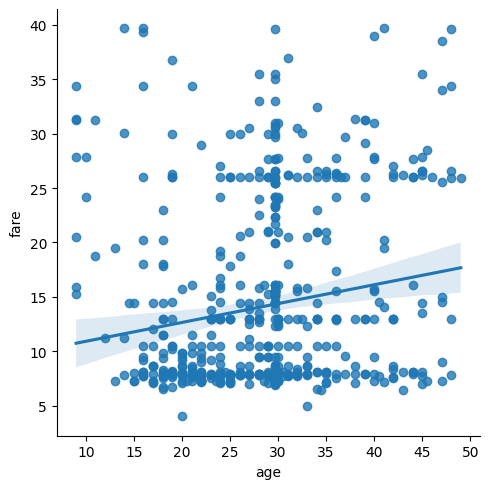

In [45]:
sns.lmplot(data=df_linear, x='age',y='fare')

<Axes: ylabel='age'>

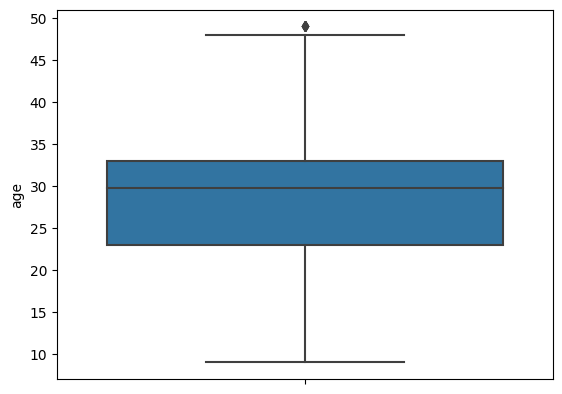

In [39]:
### to Remove outliers
sns.boxplot(data=df_linear,y='age')

In [38]:
df_linear= df_linear[(df_linear['age']>8) & (df_linear['age']<50)]

<Axes: ylabel='fare'>

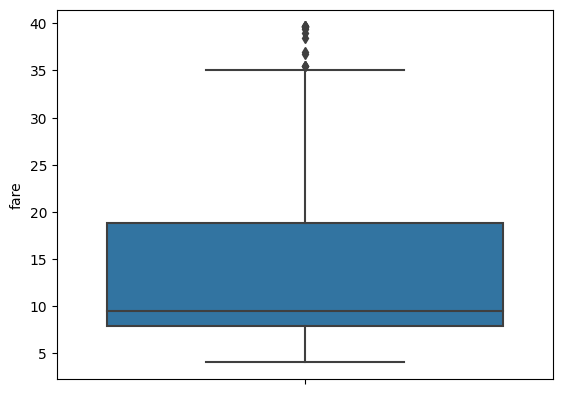

In [42]:
sns.boxplot(data=df_linear,y='fare')

In [41]:
df_linear= df_linear[(df_linear['fare']>1) & (df_linear['fare']<40)]

In [47]:
X = df_linear[['age']]
y = df_linear['fare']

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#call the model
model =LinearRegression()
#Train the model
model.fit(X,y)
#prediction 
model.predict([[80]])

LinearRegression()

### Model Evalution 
#r2
#mean square error
#MAE
#RMSE 

In [55]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8)

In [61]:
#Model
model= LinearRegression()
#train
model.fit(X_train,y_train)

#prediction
predictions= model.predict(X_test)




<Axes: xlabel='fare'>

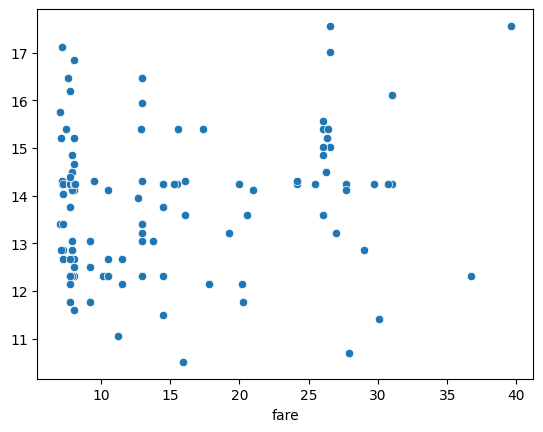

In [63]:
#compare 
#Now to know the accuracy of the model compare prediction values which are based on  X_test to actual y_test values

sns.scatterplot(x=y_test, y= predictions)

Accuracy is not good so now we move towards model score

In [64]:
model.score(X_test,y_test)

0.016568318974677365

if score is 1 or nearby one it is good otherwise it's not good so we move to another approch 

In [69]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
MAE= mean_absolute_error(y_true=y_test,y_pred=predictions)
MSE=mean_squared_error(y_true=y_test,y_pred=predictions)
RMSE=mean_squared_error(y_true=y_test,y_pred=predictions ,squared=False)
r2=r2_score(y_true=y_test,y_pred=predictions)
print('MAE :',MAE)
print('MSE :',MSE)
print('RMSE :',RMSE)
print('r2 :',r2)

MAE : 6.5747436929854715
MSE : 65.01398427234228
RMSE : 8.063124969411195
r2 : 0.016568318974677365
